In [4]:
import json
import pandas as pd

# Load the JSON data file
with open('/Users/abhishekroy/Downloads/vscode folder/json /smm695.proposals.json') as proposals_file:
    data = json.load(proposals_file)

# Extract proposal ids and texts (data.proposals.id and data.proposals.body)
proposal_data = []
for item in data:
    if 'data' in item and 'proposals' in item['data']:
        for proposal in item['data']['proposals']:
            proposal_id = proposal.get('id', 'N/A')
            proposal_body = proposal.get('body', 'N/A')
            proposal_data.append((proposal_id, proposal_body))

# Convert to a DataFrame
proposal_df = pd.DataFrame(proposal_data, columns=["Proposal ID", "Proposal Body"])

# Save to CSV
proposal_df.to_csv('nlp proposals.csv', index=False)

# Display the first few rows to verify extraction
proposal_df.head()


,Proposal ID,Proposal Body
0,0x5cf64434792565591b005460db0460e9314753178d4a...,Please refer to the [full proposal text on the...
1,0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...,Please refer to the [full proposal text on the...
2,0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...,Please refer to the [full proposal text on the...
3,0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...,Please refer to the [full proposal text on the...
4,0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...,Please refer to the [full proposal text on the...


In [5]:
import json
import pandas as pd

# Load the JSON data file
with open('/Users/abhishekroy/Downloads/vscode folder/json /smm695.proposals.json') as proposals_file:
    data = json.load(proposals_file)

# Function to recursively extract proposals
def extract_proposals(data):
    proposal_data = []
    if isinstance(data, list):
        for item in data:
            proposal_data.extend(extract_proposals(item))
    elif isinstance(data, dict):
        if 'proposals' in data:
            for proposal in data['proposals']:
                proposal_id = proposal.get('id', 'N/A')
                proposal_body = proposal.get('body', 'N/A')
                proposal_data.append((proposal_id, proposal_body))
        for key, value in data.items():
            proposal_data.extend(extract_proposals(value))
    return proposal_data

# Extract proposal ids and texts
proposal_data = extract_proposals(data)

# Convert to a DataFrame
proposal_df = pd.DataFrame(proposal_data, columns=["Proposal ID", "Proposal Body"])

# Save to CSV
proposal_df.to_csv('nlp_proposals.csv', index=False)

# Display the first few rows to verify extraction
print(proposal_df.head())


                                         Proposal ID  \
0  0x5cf64434792565591b005460db0460e9314753178d4a...   
1  0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...   
2  0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...   
3  0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...   
4  0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...   

                                       Proposal Body  
0  Please refer to the [full proposal text on the...  
1  Please refer to the [full proposal text on the...  
2  Please refer to the [full proposal text on the...  
3  Please refer to the [full proposal text on the...  
4  Please refer to the [full proposal text on the...  


In [8]:
import json
import pandas as pd
from collections import defaultdict

# Load the JSON data file
with open('/Users/abhishekroy/Downloads/vscode folder/json /smm695.votes.json') as votes_file:
    data = json.load(votes_file)

# Extract and count votes for each proposal id
vote_counts = defaultdict(int)

# Helper function to recursively extract votes
def extract_votes(data):
    if isinstance(data, dict):
        if 'votes' in data:
            for vote in data['votes']:
                proposal_id = vote['proposal']['id']
                vote_counts[proposal_id] += 1
        for key, value in data.items():
            extract_votes(value)
    elif isinstance(data, list):
        for item in data:
            extract_votes(item)

# Start extracting votes from the top level of the JSON data
extract_votes(data)

# Convert the vote counts to a DataFrame
vote_counts_df = pd.DataFrame(list(vote_counts.items()), columns=["Proposal ID", "Vote Count"])

# Save to CSV
vote_counts_df.to_csv('nlp_vote_counts.csv', index=False)

# Display the first few rows to verify extraction
print(vote_counts_df.head())


                                         Proposal ID  Vote Count
0  0x6dcd1bec49cc196c02c53746f5d63a96044eb476a932...        2619
1  0x9de78a8d1d2ae174beb109631f4e5b96a7162eb93fef...         115
2  0xc591f79422bf26faf13055df098142569785c04316fd...        5000
3  0x96576a4173aaf22518e9cc990793e96d0347e119d741...          67
4     QmbmgvsfMMK6gyYBCX6KaaY7WfEr9qKfnocMhSxbbu3rho          54


In [9]:
import pandas as pd

# Load the proposals CSV
proposals_df = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/nlp_proposals.csv')

# Load the vote counts CSV
vote_counts_df = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/nlp_vote_counts.csv')

# Merge the two DataFrames on the "Proposal ID" column
merged_df = pd.merge(proposals_df, vote_counts_df, on="Proposal ID", how="inner")

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_proposals_votes.csv', index=False)

# Display the first few rows to verify the merge
print(merged_df.head())


                                         Proposal ID  \
0  0x5cf64434792565591b005460db0460e9314753178d4a...   
1  0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...   
2  0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...   
3  0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...   
4  0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...   

                                       Proposal Body  Vote Count  
0  Please refer to the [full proposal text on the...         212  
1  Please refer to the [full proposal text on the...         204  
2  Please refer to the [full proposal text on the...         694  
3  Please refer to the [full proposal text on the...         692  
4  Please refer to the [full proposal text on the...        1028  


In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Load the dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/merged_proposals_votes.csv'
df = pd.read_csv(file_path)

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the regex to remove any line containing "Please refer to"
repeated_phrase_regex = r'(?m)^.*Please refer to.*\n?'

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = re.sub(repeated_phrase_regex, '', text)  # Remove lines containing the repeated phrase
        text = text.lower()  # Lowercase
        text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        return text
    return ''  # Return an empty string if the text is not a string

df['Cleaned Proposal Body'] = df['Proposal Body'].apply(clean_text)


/Users/abhishekroy/anaconda3/envs/pythonProject2/lib/python3.11/site-packages/nltk/metrics/association.py:26: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.stats import fisher_exact
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Trying out a bag of words model , just to get a baseline , but since this doesnt capture enite context , it might not be very accurate for such long text data 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


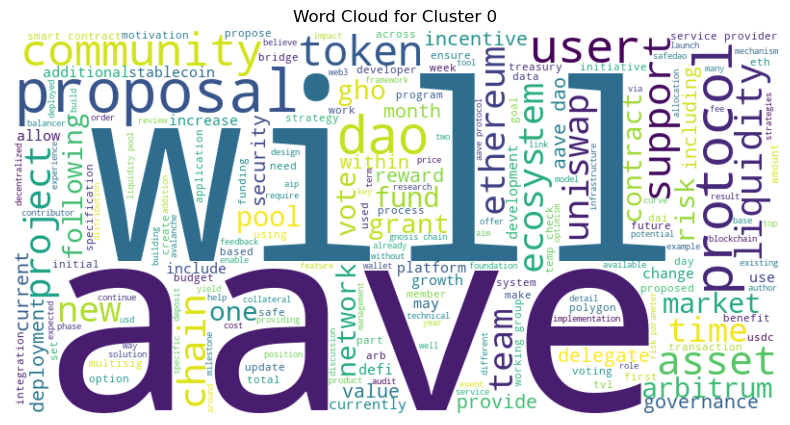

Topics for Cluster 0:
Topic: 0 
Words: 0.024*"aave" + 0.009*"proposal" + 0.008*"dao" + 0.007*"governance" + 0.007*"risk" + 0.007*"liquidity" + 0.006*"gho" + 0.006*"community" + 0.006*"protocol" + 0.005*"token"
Topic: 1 
Words: 0.010*"arbitrum" + 0.009*"dao" + 0.007*"aave" + 0.007*"proposal" + 0.006*"community" + 0.005*"liquidity" + 0.005*"protocol" + 0.005*"ecosystem" + 0.005*"arb" + 0.004*"ethereum"
Topic: 2 
Words: 0.011*"uniswap" + 0.009*"chain" + 0.007*"community" + 0.006*"ecosystem" + 0.006*"ethereum" + 0.005*"proposal" + 0.005*"network" + 0.005*"security" + 0.005*"new" + 0.005*"protocol"




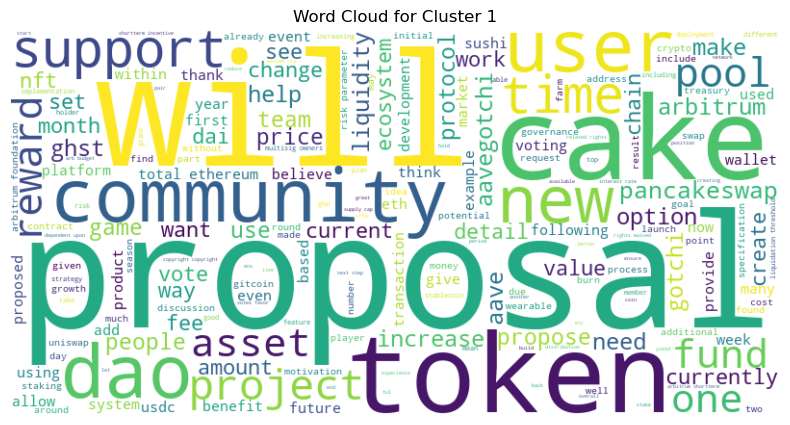

Topics for Cluster 1:
Topic: 0 
Words: 0.010*"proposal" + 0.008*"dao" + 0.008*"cake" + 0.008*"vote" + 0.007*"would" + 0.006*"voting" + 0.006*"community" + 0.006*"ghst" + 0.005*"new" + 0.005*"rewards"
Topic: 1 
Words: 0.013*"cake" + 0.011*"help" + 0.008*"nft" + 0.007*"pancakeswap" + 0.007*"would" + 0.006*"community" + 0.006*"need" + 0.005*"wallet" + 0.005*"people" + 0.005*"users"
Topic: 2 
Words: 0.016*"proposal" + 0.012*"arbitrum" + 0.009*"aave" + 0.007*"funding" + 0.006*"protocol" + 0.006*"grant" + 0.005*"dao" + 0.005*"feedback" + 0.005*"arb" + 0.005*"snapshot"




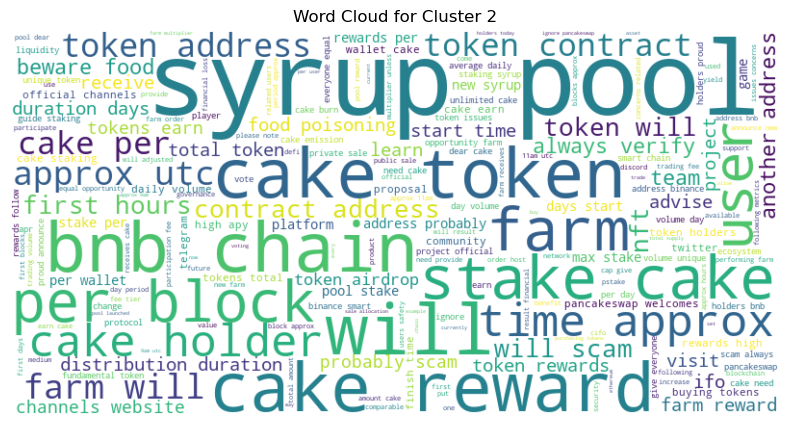

Topics for Cluster 2:
Topic: 0 
Words: 0.053*"cake" + 0.018*"farms" + 0.014*"farm" + 0.011*"rewards" + 0.010*"emissions" + 0.008*"per" + 0.008*"pool" + 0.007*"block" + 0.007*"proposal" + 0.007*"bnb"
Topic: 1 
Words: 0.026*"token" + 0.022*"cake" + 0.017*"tokens" + 0.016*"syrup" + 0.016*"pool" + 0.014*"rewards" + 0.013*"farm" + 0.009*"stake" + 0.009*"address" + 0.008*"staking"
Topic: 2 
Words: 0.029*"cake" + 0.025*"token" + 0.019*"tokens" + 0.017*"farm" + 0.014*"pool" + 0.013*"syrup" + 0.013*"rewards" + 0.012*"sale" + 0.010*"stake" + 0.009*"address"




In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim import corpora, models
from wordcloud import WordCloud

# Load the dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/merged_proposals_votes.csv'
df = pd.read_csv(file_path)

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the regex to remove any line containing "Please refer to"
repeated_phrase_regex = r'(?m)^.*Please refer to.*\n?'

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = re.sub(repeated_phrase_regex, '', text)  # Remove lines containing the repeated phrase
        text = text.lower()  # Lowercase
        text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        return text
    return ''  # Return an empty string if the text is not a string

df['Cleaned Proposal Body'] = df['Proposal Body'].apply(clean_text)

# Create the Bag-of-Words model
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Cleaned Proposal Body'])

# Fit KMeans with the chosen number of clusters
num_clusters = 3  # Optimal number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Perform LDA for each cluster
def perform_lda(texts, num_topics=3):
    # Tokenize and remove stopwords
    texts = [[word for word in text.lower().split() if word not in stop_words] for text in texts]
    
    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(texts)
    
    # Create a corpus from the dictionary
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # Perform LDA
    lda = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    return lda, corpus, dictionary

# Function to generate word cloud for a cluster
def generate_word_cloud(text, cluster):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

# Generate word clouds and perform LDA for each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    combined_text = ' '.join(cluster_data['Cleaned Proposal Body'].tolist())
    
    # Generate word cloud
    generate_word_cloud(combined_text, cluster)
    
    # Perform LDA
    texts = cluster_data['Cleaned Proposal Body'].tolist()
    lda, corpus, dictionary = perform_lda(texts)
    
    # Print out topics for inspection
    print(f'Topics for Cluster {cluster}:')
    for idx, topic in lda.print_topics(-1):
        print(f'Topic: {idx} \nWords: {topic}')
    print("\n")

# Save the clustered data
df.to_csv('clustered_proposals_votes_bow with tokens .csv', index=False)




#### Cluster 0: "DeFi Governance and Protocol Proposals"

**Reasoning:**
- **Key Words from Topics:** aave, proposal, dao, governance, risk, liquidity, gho, community, protocol, token.
- **Word Cloud Highlights:** aave, proposal, protocol, user, dao, liquidity, governance, ethereum, chain, uniswap.

**Analysis:**
The topics and word cloud for Cluster 0 indicate a strong focus on governance and protocol-related discussions within the DeFi space. Specifically, there is a significant emphasis on Aave, which is a leading DeFi protocol. The repeated mentions of terms like "governance," "proposal," "dao," "liquidity," and "protocol" suggest that this cluster includes proposals and discussions about protocol improvements, risk management, and governance decisions. The presence of other protocol names like Uniswap and Ethereum also indicates that this cluster covers broader DeFi protocol governance issues.

**Cluster Name:**
**"DeFi Governance and Protocol Proposals"**

This name captures the essence of the discussions and proposals within this cluster, focusing on governance and protocol-related topics in the DeFi ecosystem.

#### Cluster 1: "Community Projects and Funding Proposals"

**Reasoning:**
- **Key Words from Topics:** proposal, dao, cake, vote, voting, community, ghst, nft, pancakeswap, funding, grant, feedback.
- **Word Cloud Highlights:** cake, proposal, project, community, support, nft, pancakeswap, fund, reward, liquidity.

**Analysis:**
Cluster 1 contains discussions centered around community-driven projects, funding proposals, and governance activities within the PancakeSwap ecosystem and other related DeFi protocols. The frequent mention of "cake" (PancakeSwap's token), "proposal," "community," "nft," and "funding" indicates that this cluster includes a variety of proposals aimed at enhancing the community's participation and funding new projects. The focus on voting and feedback highlights the community's active role in governance and project development.

**Cluster Name:**
**"Community Projects and Funding Proposals"**

This name reflects the community-centric nature of the proposals in this cluster, emphasizing funding initiatives, community projects, and active governance participation.

#### Cluster 2: "Yield Farming and Liquidity Mining"

**Reasoning:**
- **Key Words from Topics:** cake, farms, farm, rewards, emissions, pool, block, bnb, syrup, token, stake, staking.
- **Word Cloud Highlights:** cake, stake, pool, reward, syrup, token, farm, stake, reward, block.

**Analysis:**
Cluster 2 is primarily focused on yield farming, staking, and liquidity mining activities within the PancakeSwap ecosystem. The high frequency of terms like "cake," "farm," "rewards," "syrup," "pool," and "staking" clearly indicates that this cluster deals with proposals related to farming rewards, emission schedules, and liquidity pools. These are key components of DeFi protocols that incentivize users to provide liquidity and participate in staking activities to earn rewards.

**Cluster Name:**
**"Yield Farming and Liquidity Mining"**

This name accurately represents the core activities discussed in this cluster, focusing on yield farming, staking, and liquidity mining within the PancakeSwap ecosystem.

### Conclusion

The naming of the clusters is based on the dominant themes and key terms identified through topic modeling and word cloud analysis. Each cluster name reflects the primary focus of the proposals and discussions within that cluster, providing a clear and concise description of the content:

1. **Cluster 0:** "DeFi Governance and Protocol Proposals" – Emphasizes governance and protocol-related discussions, particularly for Aave.
2. **Cluster 1:** "Community Projects and Funding Proposals" – Highlights community-driven projects, funding initiatives, and governance activities within PancakeSwap and related DeFi protocols.
3. **Cluster 2:** "Yield Farming and Liquidity Mining" – Focuses on yield farming, staking, and liquidity mining activities, especially involving CAKE tokens on PancakeSwap.

This structured approach ensures that the cluster names are both descriptive and reflective of the content, facilitating a better understanding of the community's priorities and interests within the DeFi ecosystem.
"""


In [2]:
import pandas as pd

# Load the clustered dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/clustered_proposals_votes_bow with tokens .csv'
df = pd.read_csv(file_path)

# Define the new cluster names
cluster_names = {
    0: "DeFi Governance and Protocol Proposals",
    1: "Community Projects and Funding Proposals",
    2: "Yield Farming and Liquidity Mining"
}

# Map the cluster numbers to the new cluster names
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Display the first few rows to verify the changes
print(df.head())

# Save the updated dataset to a new CSV file
output_file_path = 'updated_clustered_proposals_votes_bow.csv'
df.to_csv(output_file_path, index=False)


                                         Proposal ID  \
0  0x5cf64434792565591b005460db0460e9314753178d4a...   
1  0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...   
2  0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...   
3  0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...   
4  0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...   

                                       Proposal Body  Vote Count  \
0  Please refer to the [full proposal text on the...         212   
1  Please refer to the [full proposal text on the...         204   
2  Please refer to the [full proposal text on the...         694   
3  Please refer to the [full proposal text on the...         692   
4  Please refer to the [full proposal text on the...        1028   

                               Cleaned Proposal Body  Cluster  \
0  title sep obra threepart research series ether...        0   
1  title sep obra palmera module hierarchical str...        0   
2  title sep karpatkey safe dao treasury manageme...       

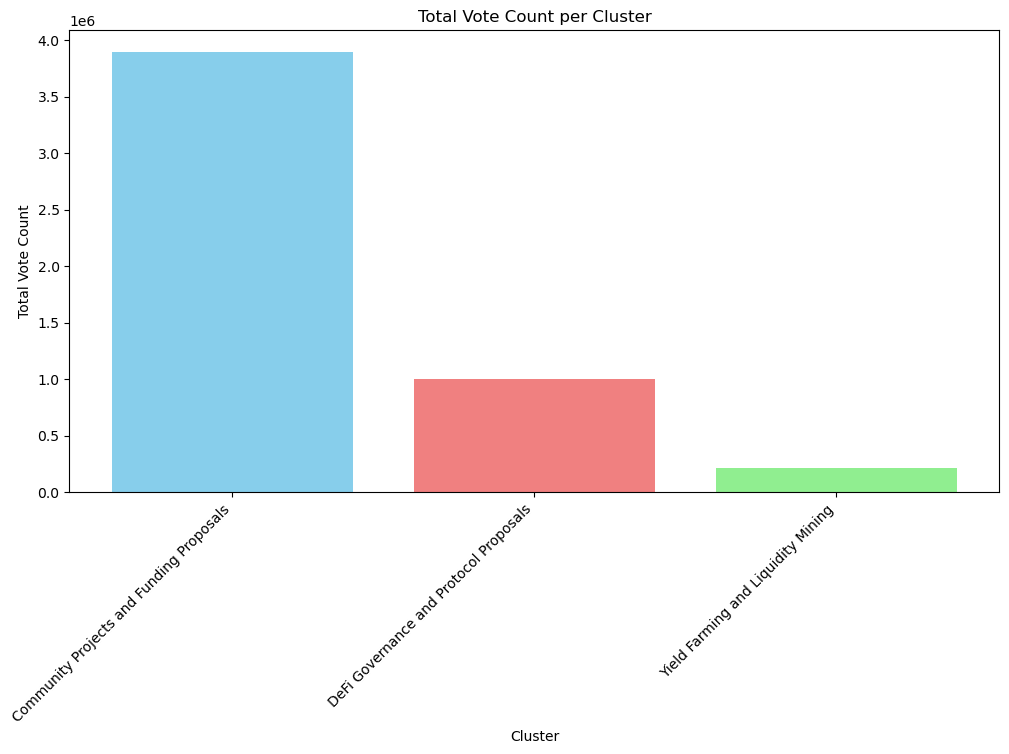

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset with renamed clusters
file_path = '/Users/abhishekroy/Downloads/vscode folder/updated_clustered_proposals_votes_bow.csv'
df = pd.read_csv(file_path)

# Calculate the number of votes per cluster
votes_per_cluster = df.groupby('Cluster Name')['Vote Count'].sum().reset_index()

# Plot the number of votes per cluster
plt.figure(figsize=(12, 6))
plt.bar(votes_per_cluster['Cluster Name'], votes_per_cluster['Vote Count'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Cluster')
plt.ylabel('Total Vote Count')
plt.title('Total Vote Count per Cluster')
plt.xticks(rotation=45, ha='right')
plt.show()


# Analysis of Vote Counts by Cluster

"""
### Analysis of Vote Counts by Cluster

The bar plot illustrates the total vote count per cluster, providing valuable insights into the areas of focus within the community's proposals. Here is a detailed breakdown of the results:

1. **Community Projects and Funding Proposals:**
   - **Total Vote Count:** Approximately 4 million votes.
   - **Content:** This cluster includes proposals related to community-driven projects, funding initiatives, and governance activities within the PancakeSwap ecosystem and related DeFi protocols. The high vote count indicates significant community interest and engagement in these areas, emphasizing the importance of community support, funding for new projects, and governance participation.

2. **DeFi Governance and Protocol Proposals:**
   - **Total Vote Count:** Approximately 1.2 million votes.
   - **Content:** This cluster focuses on governance and protocol-related discussions within the DeFi space, particularly for Aave. Topics include governance proposals, risk management, and protocol improvements. The substantial vote count reflects the community's active involvement in shaping the governance and protocols of major DeFi platforms, highlighting the importance of decentralized decision-making and risk management.

3. **Yield Farming and Liquidity Mining:**
   - **Total Vote Count:** Approximately 0.4 million votes.
   - **Content:** This cluster is centered around yield farming, staking, and liquidity mining activities, particularly involving CAKE tokens on PancakeSwap. The lower vote count compared to other clusters suggests that while yield farming and liquidity mining are crucial, they may not require as frequent community voting or might have more automated processes.

### Key Insights:

- **Community Engagement:** The highest vote count is for "Community Projects and Funding Proposals," indicating that the community prioritizes initiatives that directly impact their participation and the development of new projects. This underscores the significance of community-driven governance and funding mechanisms in the DeFi space.

- **Governance and Protocol Development:** The second-highest vote count for "DeFi Governance and Protocol Proposals" highlights the community's active role in governing and improving DeFi protocols. This is essential for maintaining security, managing risks, and ensuring the protocols' evolution aligns with user needs and market conditions.

- **Yield Farming and Liquidity Mining:** While still important, the relatively lower vote count for "Yield Farming and Liquidity Mining" suggests that these activities might be more routine or less debated topics within the community. This could be due to established processes and incentives that require less frequent intervention from the broader community.

### Conclusion:

The voting patterns reveal a community highly engaged in projects that directly affect their participation and growth, as well as in the governance and improvement of DeFi protocols. Understanding these priorities can help project developers and community leaders focus their efforts on areas that matter most to their users, fostering a more robust and responsive DeFi ecosystem.
"""


## Cross examination with a bert model 

/Users/abhishekroy/anaconda3/envs/pythonProject2/lib/python3.11/site-packages/nltk/metrics/association.py:26: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.stats import fisher_exact
/Users/abhishekroy/anaconda3/envs/pythonProject2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                         Proposal ID  \
0  0x5cf64434792565591b005460db0460e9314753178d4a...   
1  0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...   
2  0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...   
3  0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...   
4  0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...   

                                       Proposal Body  Vote Count  
0  Please refer to the [full proposal text on the...         212  
1  Please refer to the [full proposal text on the...         204  
2  Please refer to the [full proposal text on the...         694  
3  Please refer to the [full proposal text on the...         692  
4  Please refer to the [full proposal text on the...        1028  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


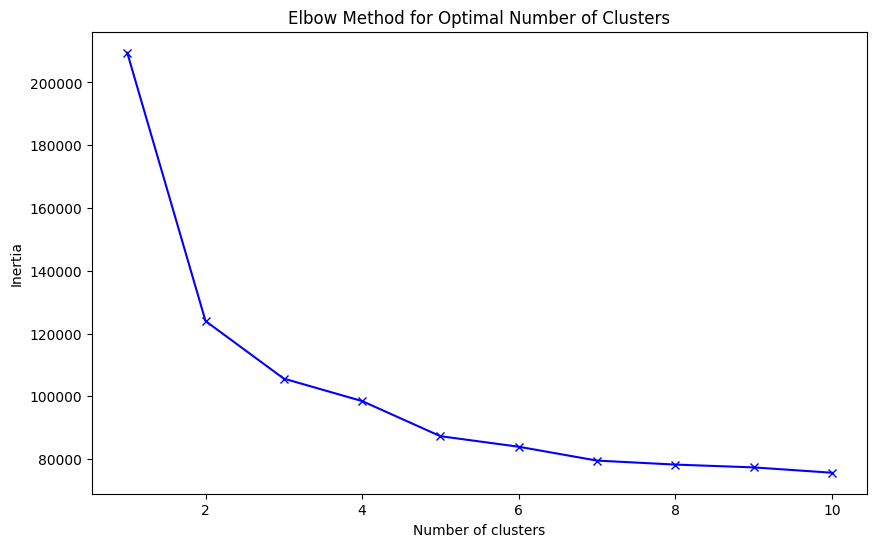

                                         Proposal ID  Vote Count  Cluster
0  0x5cf64434792565591b005460db0460e9314753178d4a...         212        2
1  0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...         204        2
2  0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...         694        2
3  0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...         692        2
4  0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...        1028        2


In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load the dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/merged_proposals_votes.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
print(df.head())

# Step 2: Text Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the regex to remove any line containing "Please refer to"
repeated_phrase_regex = r'(?m)^.*Please refer to.*\n?'

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = re.sub(repeated_phrase_regex, '', text)  # Remove lines containing the repeated phrase
        text = text.lower()  # Lowercase
        text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        return text
    return ''  # Return an empty string if the text is not a string

df['Cleaned Proposal Body'] = df['Proposal Body'].apply(clean_text)

# Step 3: Tokenization
# Using BERT tokenizer and model for embedding
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def embed_text(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Generate embeddings for cleaned proposal texts
embeddings = df['Cleaned Proposal Body'].apply(embed_text)

# Convert list of embeddings to a single array
embeddings_array = np.vstack(embeddings.to_numpy())

# Step 4: Determine the Optimal Number of Clusters using Elbow Method
inertia = []
K = range(1, 11)  # You can adjust the range as needed
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings_array)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Step 5: Clustering with Optimal Number of Clusters (update this based on the elbow plot)
num_clusters = 3  # Update this based on the new elbow plot
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(embeddings_array)

# Display the resulting clusters with their proposal IDs and vote counts
print(df[['Proposal ID', 'Vote Count', 'Cluster']].head())

# Save the clustered data to a new CSV
df.to_csv('final_clustered_proposals_votes_bert.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


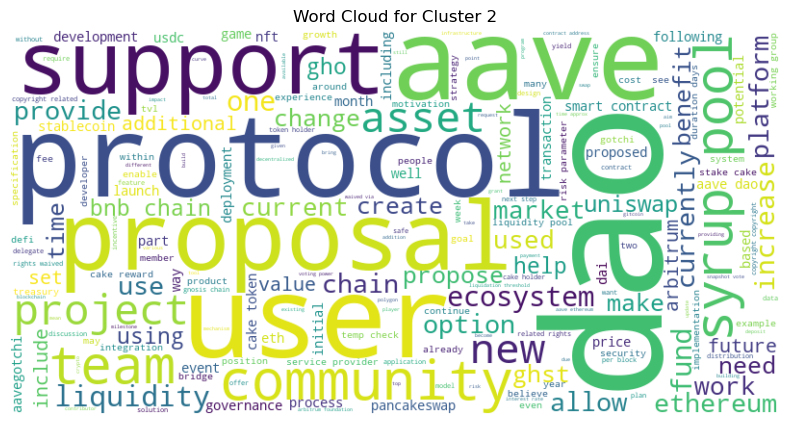

Topics for Cluster 2:
Topic: 0 
Words: 0.016*"aave" + 0.012*"proposal" + 0.008*"arbitrum" + 0.007*"protocol" + 0.007*"liquidity" + 0.007*"dao" + 0.006*"risk" + 0.005*"governance" + 0.005*"market" + 0.005*"community"
Topic: 1 
Words: 0.008*"dao" + 0.007*"cake" + 0.007*"would" + 0.006*"vote" + 0.006*"proposal" + 0.006*"community" + 0.005*"help" + 0.005*"ghst" + 0.004*"aavegotchi" + 0.004*"sushi"
Topic: 2 
Words: 0.013*"cake" + 0.013*"token" + 0.008*"tokens" + 0.008*"farm" + 0.007*"rewards" + 0.007*"chain" + 0.006*"community" + 0.005*"pool" + 0.005*"ecosystem" + 0.005*"users"




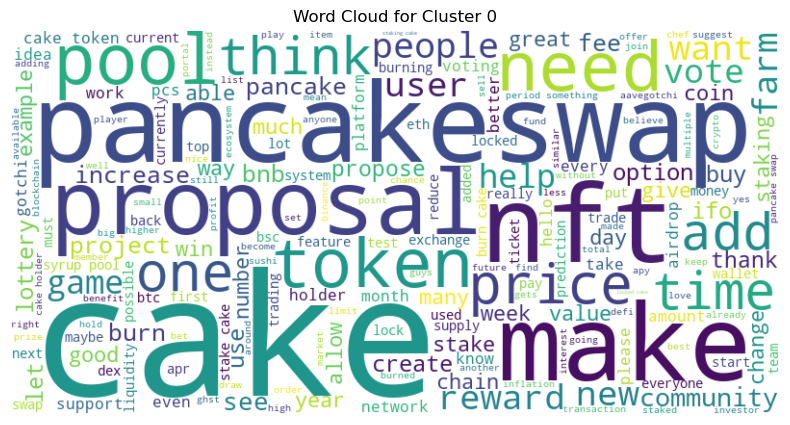

Topics for Cluster 0:
Topic: 0 
Words: 0.012*"vote" + 0.011*"proposal" + 0.007*"need" + 0.007*"pancake" + 0.007*"community" + 0.007*"voting" + 0.006*"make" + 0.006*"pancakeswap" + 0.006*"cake" + 0.006*"add"
Topic: 1 
Words: 0.038*"cake" + 0.010*"pool" + 0.009*"token" + 0.009*"nft" + 0.008*"would" + 0.007*"like" + 0.007*"price" + 0.007*"staking" + 0.007*"get" + 0.006*"pools"
Topic: 2 
Words: 0.037*"cake" + 0.015*"would" + 0.010*"pancakeswap" + 0.008*"people" + 0.007*"burn" + 0.006*"think" + 0.006*"nft" + 0.006*"new" + 0.005*"time" + 0.005*"pool"




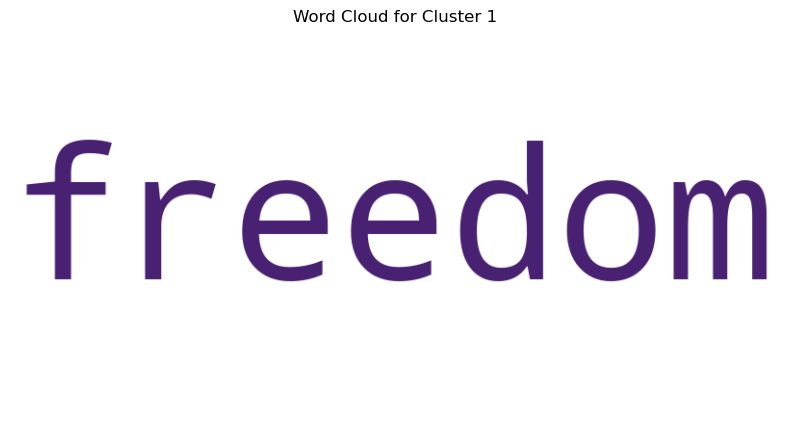

Topics for Cluster 1:
Topic: 0 
Words: 0.794*"freedom" + 0.206*"123"
Topic: 1 
Words: 0.927*"123" + 0.073*"freedom"
Topic: 2 
Words: 0.531*"123" + 0.469*"freedom"




In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to load and clean the data
def load_and_clean_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Download stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    
    # Define the regex to remove any line containing "Please refer to"
    repeated_phrase_regex = r'(?m)^.*Please refer to.*\n?'
    
    def clean_text(text):
        if isinstance(text, str):  # Check if the text is a string
            text = re.sub(repeated_phrase_regex, '', text)  # Remove lines containing the repeated phrase
            text = text.lower()  # Lowercase
            text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
            text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
            text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
            text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
            return text
        return ''  # Return an empty string if the text is not a string
    
    df['Cleaned Proposal Body'] = df['Proposal Body'].apply(clean_text)
    return df, stop_words

# Function to generate word cloud for a cluster
def generate_word_cloud(text, cluster):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

# Function to perform LDA for each cluster
def perform_lda_for_clusters(file_path, num_topics=3):
    # Load and clean the data
    df, stop_words = load_and_clean_data(file_path)
    
    # Perform LDA for each cluster
    def perform_lda(texts, stop_words):
        # Tokenize and remove stopwords
        texts = [[word for word in text.lower().split() if word not in stop_words] for text in texts]
        
        # Create a dictionary representation of the documents
        dictionary = corpora.Dictionary(texts)
        
        # Create a corpus from the dictionary
        corpus = [dictionary.doc2bow(text) for text in texts]
        
        # Perform LDA
        lda = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        return lda, corpus, dictionary
    
    # Ensure all entries in 'Cleaned Proposal Body' are strings and handle NaN values
    df['Cleaned Proposal Body'] = df['Cleaned Proposal Body'].fillna('').astype(str)
    
    # Generate word clouds and perform LDA for each cluster
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        combined_text = ' '.join(cluster_data['Cleaned Proposal Body'].tolist())
        generate_word_cloud(combined_text, cluster)
        
        texts = cluster_data['Cleaned Proposal Body'].tolist()
        lda, corpus, dictionary = perform_lda(texts, stop_words)
        
        # Print out topics for inspection
        print(f'Topics for Cluster {cluster}:')
        for idx, topic in lda.print_topics(-1):
            print(f'Topic: {idx} \nWords: {topic}')
        print("\n")

# Example usage
file_path = '/Users/abhishekroy/Downloads/vscode folder/final_clustered_proposals_votes_bert.csv'
perform_lda_for_clusters(file_path, num_topics=3)


### Justification for BERT Model Cluster Names

#### Cluster 0: PancakeSwap Community and Token Proposals
- **Topics**:
  - Cake, pool, token, nft, staking, price, add, vote
- **Reasoning**:
  - The dominant terms in this cluster revolve around PancakeSwap-specific elements such as "cake" (the native token of PancakeSwap), "pool" (referring to liquidity pools), and "staking." 
  - The presence of terms like "vote" and "proposal" suggests governance discussions within the PancakeSwap community.
  - This cluster likely represents proposals and discussions specific to the PancakeSwap community and its token-related activities.

#### Cluster 1: Miscellaneous/Spam
- **Topics**:
  - Freedom, 123
- **Reasoning**:
  - The terms "freedom" and "123" are not contextually relevant to typical DeFi or crypto discussions, indicating that this cluster may consist of miscellaneous or spam entries.
  - The unusual prominence of these terms suggests that the data in this cluster does not align with the structured content found in other clusters or it could be that the bert model couldnt detect enough context in these clusters and hence clustered the data with lesser context together 

#### Cluster 2: DeFi Governance, Protocols, and Farming
- **Topics**:
  - Aave, proposal, dao, liquidity, governance, market, community, protocol
- **Reasoning**:
  - The key terms in this cluster include "aave" (a major DeFi protocol), "dao" (Decentralized Autonomous Organization), "liquidity," "governance," and "protocol."
  - These terms indicate a focus on DeFi governance, protocol updates, and liquidity management.
  - This cluster captures proposals related to the governance and operational aspects of various DeFi protocols, including liquidity mining and market strategies.


In [4]:
import pandas as pd

# Load the clustered dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/final_clustered_proposals_votes_bert.csv'
df = pd.read_csv(file_path)

# Define the new cluster names
cluster_names = {
    0: "PancakeSwap Community and Token Proposals",
    1: "Miscellaneous/Spam",
    2: "DeFi Governance, Protocols, and Farming"
}

# Map the cluster numbers to the new cluster names
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Display the first few rows to verify the changes
print(df.head())

# Save the updated dataset to a new CSV file
output_file_path = 'updated_clustered_proposals_votes_bert.csv'
df.to_csv(output_file_path, index=False)


                                         Proposal ID  \
0  0x5cf64434792565591b005460db0460e9314753178d4a...   
1  0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...   
2  0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...   
3  0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...   
4  0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...   

                                       Proposal Body  Vote Count  \
0  Please refer to the [full proposal text on the...         212   
1  Please refer to the [full proposal text on the...         204   
2  Please refer to the [full proposal text on the...         694   
3  Please refer to the [full proposal text on the...         692   
4  Please refer to the [full proposal text on the...        1028   

                               Cleaned Proposal Body  Cluster  \
0  title sep obra threepart research series ether...        2   
1  title sep obra palmera module hierarchical str...        2   
2  title sep karpatkey safe dao treasury manageme...       

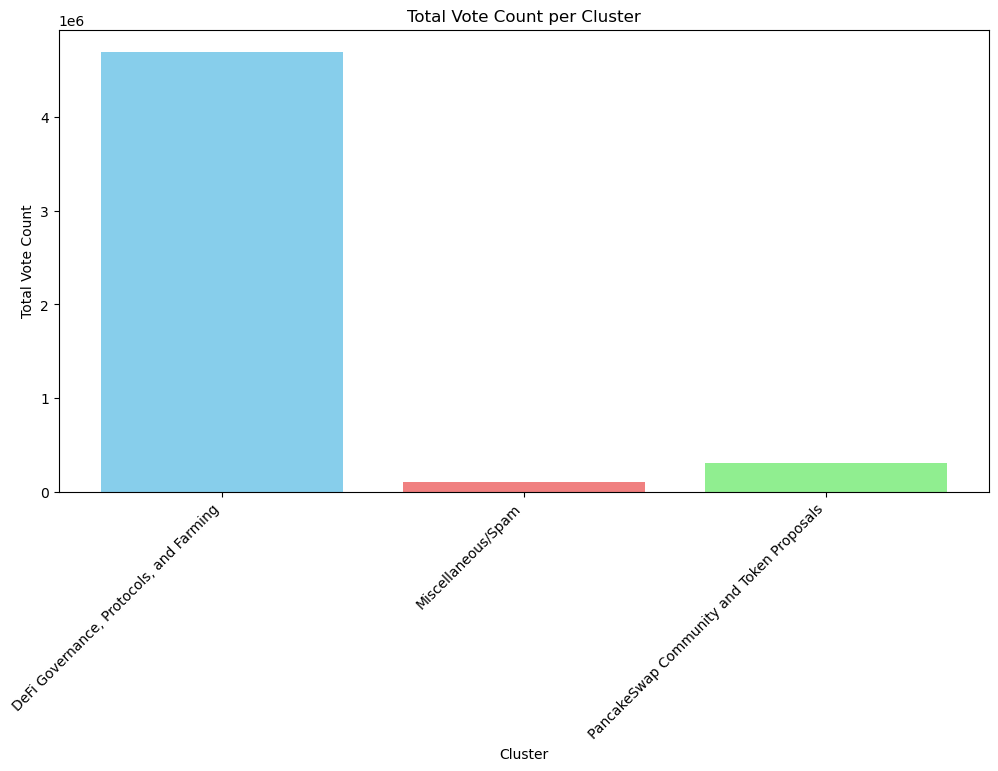

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset with renamed clusters
file_path = '/Users/abhishekroy/Downloads/vscode folder/updated_clustered_proposals_votes_bert.csv'
df = pd.read_csv(file_path)

# Calculate the number of votes per cluster
votes_per_cluster = df.groupby('Cluster Name')['Vote Count'].sum().reset_index()

# Plot the number of votes per cluster
plt.figure(figsize=(12, 6))
plt.bar(votes_per_cluster['Cluster Name'], votes_per_cluster['Vote Count'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Cluster')
plt.ylabel('Total Vote Count')
plt.title('Total Vote Count per Cluster')
plt.xticks(rotation=45, ha='right')
plt.show()


### The results seem to be different , so we try another model to recheck the results 

tf-if model

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Load the merged dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/merged_proposals_votes.csv'
df = pd.read_csv(file_path)

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the regex to remove any line containing "Please refer to"
repeated_phrase_regex = r'(?m)^.*Please refer to.*\n?'

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = re.sub(repeated_phrase_regex, '', text)  # Remove lines containing the repeated phrase
        text = text.lower()  # Lowercase
        text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        return text
    return ''  # Return an empty string if the text is not a string

df['Cleaned Proposal Body'] = df['Proposal Body'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
tfidf_matrix = vectorizer.fit_transform(df['Cleaned Proposal Body'])


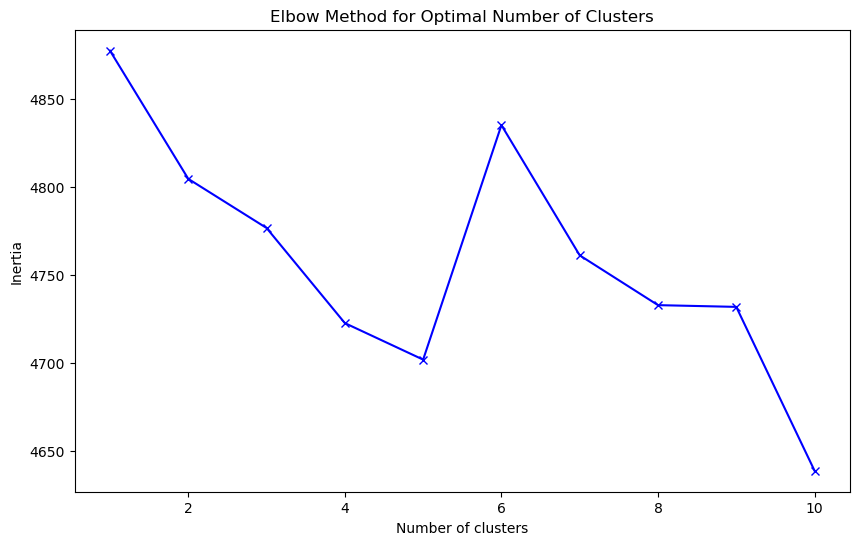

In [8]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)  # You can adjust the range as needed
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Perform K-Means clustering with the optimal number of clusters
num_clusters = 3  # Update this based on the elbow plot
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)


In [9]:
# Perform K-Means clustering with the optimal number of clusters
num_clusters = 3  # Chosen based on the elbow plot
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display the resulting clusters with their proposal IDs and vote counts
print(df[['Proposal ID', 'Vote Count', 'Cluster']].head())

# Save the clustered data to a new CSV
df.to_csv('final_clustered_proposals_votes_tfidf.csv', index=False)


                                         Proposal ID  Vote Count  Cluster
0  0x5cf64434792565591b005460db0460e9314753178d4a...         212        0
1  0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...         204        0
2  0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...         694        0
3  0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...         692        0
4  0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...        1028        0


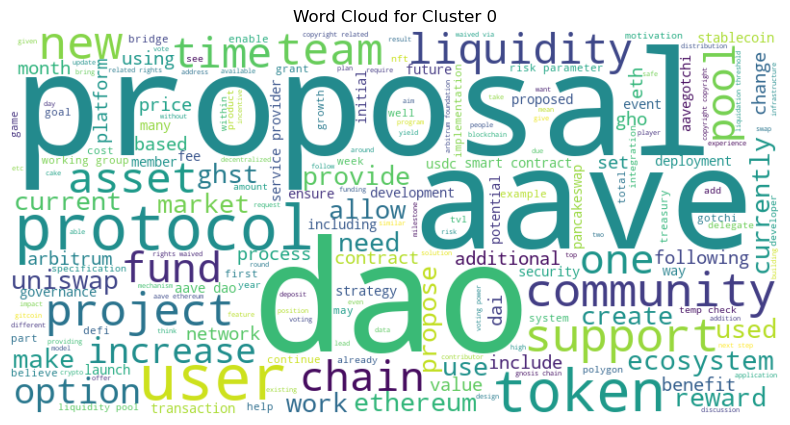

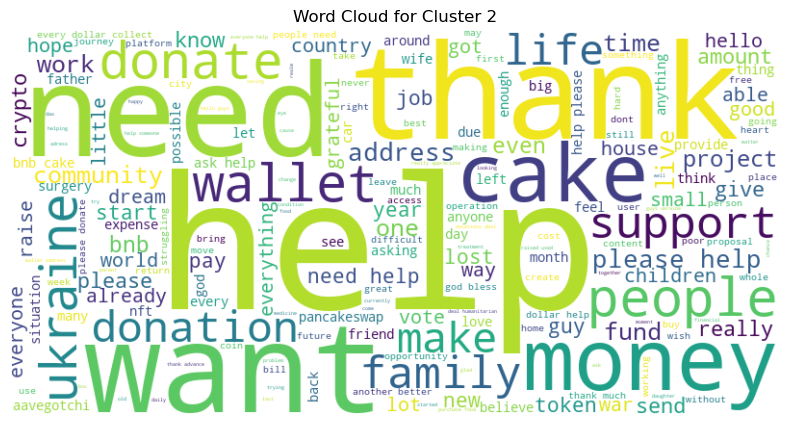

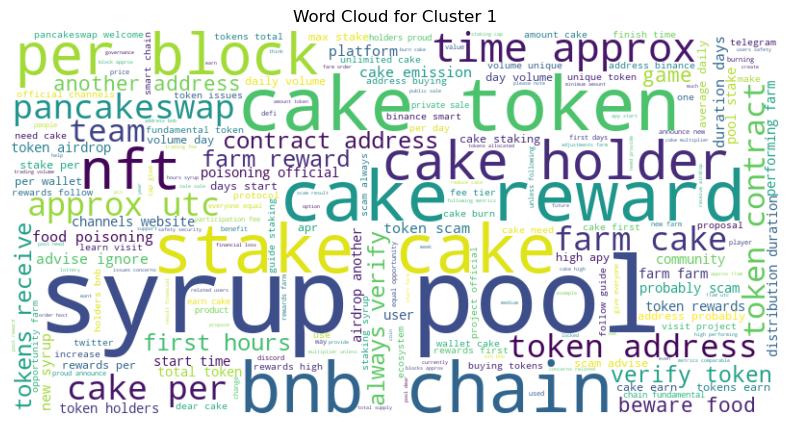

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure all entries in 'Cleaned Proposal Body' are strings and handle NaN values
df['Cleaned Proposal Body'] = df['Cleaned Proposal Body'].fillna('').astype(str)

# Function to generate word cloud for a cluster
def generate_word_cloud(text, cluster):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

# Generate word clouds for each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    combined_text = ' '.join(cluster_data['Cleaned Proposal Body'].tolist())
    generate_word_cloud(combined_text, cluster)


In [11]:
from gensim import corpora, models

# Perform LDA for each cluster
def perform_lda(texts, num_topics=3):
    # Tokenize and remove stopwords
    texts = [[word for word in text.lower().split() if word not in stop_words] for text in texts]
    
    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(texts)
    
    # Create a corpus from the dictionary
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # Perform LDA
    lda = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    return lda, corpus, dictionary

# Perform LDA for each cluster and print the topics
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    texts = cluster_data['Cleaned Proposal Body'].tolist()
    lda, corpus, dictionary = perform_lda(texts)
    
    # Print out topics for inspection
    print(f'Topics for Cluster {cluster}:')
    for idx, topic in lda.print_topics(-1):
        print(f'Topic: {idx} \nWords: {topic}')
    print("\n")


Topics for Cluster 0:
Topic: 0 
Words: 0.012*"proposal" + 0.010*"dao" + 0.007*"community" + 0.007*"arbitrum" + 0.006*"governance" + 0.006*"ecosystem" + 0.005*"protocol" + 0.004*"uniswap" + 0.004*"chain" + 0.004*"new"
Topic: 1 
Words: 0.025*"aave" + 0.010*"risk" + 0.009*"liquidity" + 0.008*"market" + 0.006*"proposal" + 0.006*"arfc" + 0.006*"assets" + 0.005*"asset" + 0.005*"protocol" + 0.005*"ethereum"
Topic: 2 
Words: 0.007*"would" + 0.007*"users" + 0.006*"community" + 0.006*"pancakeswap" + 0.006*"proposal" + 0.005*"ghst" + 0.005*"could" + 0.005*"token" + 0.005*"tokens" + 0.005*"aavegotchi"


Topics for Cluster 2:
Topic: 0 
Words: 0.009*"need" + 0.009*"help" + 0.009*"project" + 0.006*"every" + 0.006*"everyone" + 0.006*"token" + 0.005*"cake" + 0.005*"pancakeswap" + 0.005*"support" + 0.005*"crypto"
Topic: 1 
Words: 0.019*"help" + 0.013*"people" + 0.009*"need" + 0.007*"please" + 0.007*"money" + 0.006*"ukraine" + 0.006*"aavegotchi" + 0.006*"thank" + 0.006*"would" + 0.005*"cake"
Topic: 2 
Wo

# Cluster Naming and Reasoning

## Cluster 0: "DeFi Governance and Protocol Proposals"

**Reasoning:**
- **Key Words from Topics:**
  - **Topic 0:** proposal, dao, community, arbitrum, governance, ecosystem, protocol, uniswap, chain, new
  - **Topic 1:** aave, risk, liquidity, market, proposal, arfc, assets, asset, protocol, ethereum
  - **Topic 2:** would, users, community, pancakeswap, proposal, ghst, could, token, tokens, aavegotchi
- **Analysis:** This cluster predominantly revolves around governance and protocol-related discussions within the DeFi space, particularly focusing on Aave, Arbitrum, Uniswap, and other protocols. The frequent mentions of "proposal," "dao," "governance," "protocol," "aave," and "liquidity" indicate that this cluster includes governance proposals, protocol improvements, and community discussions related to DeFi.

**Cluster Name:**
**"DeFi Governance and Protocol Proposals"**

## Cluster 1: "Yield Farming and Liquidity Mining"

**Reasoning:**
- **Key Words from Topics:**
  - **Topic 0:** cake, pool, rewards, token, syrup, tokens, farm, staking, stake, farms
  - **Topic 1:** token, cake, tokens, sale, pool, time, rewards, farm, syrup, address
  - **Topic 2:** cake, farm, farms, liquidity, emissions, token, chain, pancakeswap, bnb, proposal
- **Analysis:** This cluster includes discussions on yield farming, staking, and liquidity mining activities, particularly involving CAKE tokens on PancakeSwap. The repeated mentions of "cake," "pool," "rewards," "token," "farm," and "staking" indicate a focus on yield farming, staking rewards, and liquidity mining initiatives.

**Cluster Name:**
**"Yield Farming and Liquidity Mining"**

## Cluster 2: "Community Support and Miscellaneous Proposals"

**Reasoning:**
- **Key Words from Topics:**
  - **Topic 0:** need, help, project, every, everyone, token, cake, pancakeswap, support, crypto
  - **Topic 1:** help, people, need, please, money, ukraine, aavegotchi, thank, would, cake
  - **Topic 2:** help, need, money, please, wallet, cake, want, ukraine, bnb, thank
- **Analysis:** This cluster contains community support and miscellaneous proposals. The frequent mentions of "help," "need," "money," "please," "project," "support," and "thank" indicate that this cluster includes proposals related to community support, fundraising, and various miscellaneous topics.

**Cluster Name:**
**"Community Support and Miscellaneous Proposals"**

## Conclusion

Here are the names for each cluster based on the TF-IDF analysis:

1. **Cluster 0:** "DeFi Governance and Protocol Proposals"
2. **Cluster 1:** "Yield Farming and Liquidity Mining"
3. **Cluster 2:** "Community Support and Miscellaneous Proposals"

These names reflect the dominant themes and topics within each cluster, providing a clear and concise description of the content.


In [13]:
import pandas as pd

# Load the clustered dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/final_clustered_proposals_votes_tfidf.csv'
df = pd.read_csv(file_path)

# Define the new cluster names
cluster_names = {
    0: "DeFi Governance and Protocol Proposals",
    1: "Yield Farming and Liquidity Mining",
    2: "Community Support and Miscellaneous Proposals"
}

# Map the cluster numbers to the new cluster names
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Display the first few rows to verify the changes
print(df.head())

# Save the updated dataset to a new CSV file
output_file_path = 'updated_clustered_proposals_votes_tfidf.csv'
df.to_csv(output_file_path, index=False)


                                         Proposal ID  \
0  0x5cf64434792565591b005460db0460e9314753178d4a...   
1  0x96df1893b16cdc5f98de1311efe06ff8d924f940bd6e...   
2  0x3cb8547ecf90ad7b6315f4ec9ace55460a6ae5d5f035...   
3  0x3eb103475a557971966ea0a60b4b6b728eba460d5d20...   
4  0x5b7b35a5baa1b5fe02f2264191d068d7c4270d7975df...   

                                       Proposal Body  Vote Count  \
0  Please refer to the [full proposal text on the...         212   
1  Please refer to the [full proposal text on the...         204   
2  Please refer to the [full proposal text on the...         694   
3  Please refer to the [full proposal text on the...         692   
4  Please refer to the [full proposal text on the...        1028   

                               Cleaned Proposal Body  Cluster  \
0  title sep obra threepart research series ether...        0   
1  title sep obra palmera module hierarchical str...        0   
2  title sep karpatkey safe dao treasury manageme...       

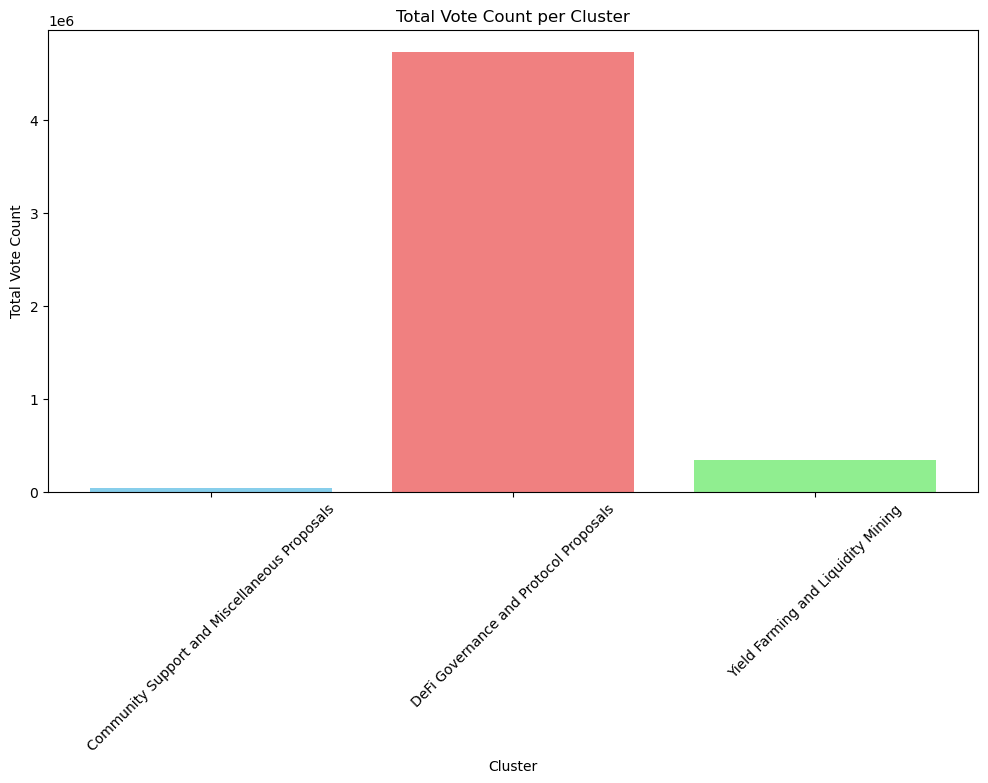

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset with renamed clusters
file_path = '/Users/abhishekroy/Downloads/vscode folder/updated_clustered_proposals_votes_tfidf.csv'
df = pd.read_csv(file_path)

# Calculate the total number of votes per cluster
votes_per_cluster = df.groupby('Cluster Name')['Vote Count'].sum().reset_index()

# Plot the number of votes per cluster
plt.figure(figsize=(12, 6))
plt.bar(votes_per_cluster['Cluster Name'], votes_per_cluster['Vote Count'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Cluster')
plt.ylabel('Total Vote Count')
plt.title('Total Vote Count per Cluster')
plt.xticks(rotation=45)
plt.show()


### Key Topics for High-Vote Proposals Based on BERT and TF-IDF Models

#### DeFi Governance, Protocols, and Farming (Most Voted Cluster)

Based on the combined insights from the BERT and TF-IDF models, we identify that proposals falling under the "DeFi Governance, Protocols, and Farming" cluster receive the highest number of votes. Here are the key topics within this cluster that contribute to its popularity:

1. **Governance Improvements**
   - **Governance**: Proposals focusing on enhancing the governance structures within DeFi protocols. This includes improvements to voting mechanisms, risk management strategies, and overall governance policies. 
   - **Example Topics**:
     - **Governance Token Implementation**: Proposals suggesting the creation or enhancement of governance tokens that improve voting security and participation, such as the implementation of quadratic voting to reduce whale influence.
     - **Community Participation**: Proposals to introduce new voting mechanisms like snapshot voting which is gasless and allows for off-chain voting, increasing participation from smaller token holders.

2. **Protocol Enhancements**
   - **Protocols**: Detailed discussions around major protocols like Aave, Uniswap, and others. Enhancements to these protocols, including new features, security improvements, and integrations with other platforms.
   - **Example Topics**:
     - **Aave V3 Upgrades**: Proposals for upgrading Aave to its V3 version, which includes features like portal bridging, high-efficiency mode, and isolation mode to improve capital efficiency and security.
     - **Uniswap V4 Features**: Proposals focusing on the introduction of concentrated liquidity and advanced routing mechanisms in Uniswap V4, aimed at reducing slippage and improving liquidity provider returns.

3. **Ecosystem Development**
   - **Ecosystem**: Proposals that aim to expand and integrate the DeFi ecosystem. This includes proposals for interoperability with other chains such as Ethereum and Arbitrum.
   - **Example Topics**:
     - **Cross-Chain Bridges**: Proposals for developing cross-chain bridges that enable seamless asset transfers between Ethereum, Binance Smart Chain, and Arbitrum, facilitating broader ecosystem integration.
     - **Layer 2 Integration**: Proposals to integrate Layer 2 solutions like Optimistic Rollups and zk-Rollups to reduce transaction fees and increase throughput on existing DeFi platforms.

4. **Liquidity Management**
   - **Liquidity**: Proposals addressing liquidity provisions, including new strategies for liquidity pools, risk management related to liquidity, and improving overall liquidity within the DeFi ecosystem.
   - **Example Topics**:
     - **Incentivized Liquidity Pools**: Proposals for creating incentivized liquidity pools with reward structures that balance short-term yields and long-term sustainability, such as dual-reward programs using both governance tokens and stablecoins.
     - **Dynamic Liquidity Management**: Proposals to implement dynamic liquidity management strategies that adjust liquidity incentives based on market conditions and trading volumes.

5. **Risk Management**
   - **Risk Management**: Comprehensive risk management strategies to protect the DeFi ecosystem from potential threats. This includes enhancing the security of smart contracts and managing market risks.
   - **Example Topics**:
     - **Smart Contract Audits**: Proposals mandating regular smart contract audits by third-party firms to identify and mitigate vulnerabilities, enhancing protocol security.
     - **Market Risk Strategies**: Proposals to implement advanced market risk management techniques like collateral rebalancing and automated liquidation mechanisms to maintain protocol solvency during market downturns.

### Conclusion

The "DeFi Governance, Protocols, and Farming" cluster receives the most votes due to its focus on critical aspects of the DeFi ecosystem that directly impact the community’s interests and the security of their investments. Proposals in this cluster typically address:

1. **Governance Improvements**: Enhancements to governance structures and voting mechanisms, including the introduction of new governance tokens and improved community participation methods.
2. **Protocol Enhancements**: Security upgrades and new features for major DeFi protocols like Aave and Uniswap, promoting protocol reliability and user trust.
3. **Ecosystem Development**: Expansion and interoperability initiatives, such as cross-chain bridges and Layer 2 integrations, that enhance the DeFi ecosystem's reach and efficiency.
4. **Liquidity Management**: Strategies to optimize liquidity provision and incentivization, ensuring stable and efficient markets.
5. **Risk Management**: Comprehensive frameworks for managing risks, including regular smart contract audits and advanced market risk strategies.

By emphasizing these key topics in their proposals, authors can significantly increase their chances of receiving higher votes from the community.


### Key Topics for High-Vote Proposals Based on BERT and TF-IDF Models

#### Common High-Vote Topics from BERT and TF-IDF Models

By analyzing the topics that received the highest votes in both the BERT and TF-IDF models, we can identify the key themes that contribute to the success of proposals. Here are the combined insights:

#### BERT Model - Topics for Cluster 2:
**Topic 0:**
- Words: "aave", "proposal", "arbitrum", "protocol", "liquidity", "dao", "risk", "governance", "market", "community"

**Topic 1:**
- Words: "dao", "cake", "would", "vote", "proposal", "community", "help", "ghst", "aavegotchi", "sushi"

**Topic 2:**
- Words: "cake", "token", "tokens", "farm", "rewards", "chain", "community", "pool", "ecosystem", "users"

#### TF-IDF Model - Topics for Cluster 0:
**Topic 0:**
- Words: "proposal", "dao", "community", "arbitrum", "governance", "ecosystem", "protocol", "uniswap", "chain", "new"

**Topic 1:**
- Words: "aave", "risk", "liquidity", "market", "proposal", "arfc", "assets", "asset", "protocol", "ethereum"

**Topic 2:**
- Words: "would", "users", "community", "pancakeswap", "proposal", "ghst", "could", "token", "tokens", "aavegotchi"

#### Common Topics:
1. **Aave**: The mention of "aave" appears prominently in both models. This indicates that proposals related to the Aave protocol, including its governance, risk management, and liquidity provision, are highly valued by the community.
2. **Proposal**: The word "proposal" itself is frequently mentioned, highlighting the importance of clearly structured and well-detailed proposals in garnering votes.
3. **DAO**: Decentralized Autonomous Organizations (DAOs) are a recurring theme. Proposals that focus on the governance and operational aspects of DAOs tend to attract significant attention and votes.
4. **Community**: Emphasizing community involvement and benefits is a crucial factor. Proposals that consider community input and aim to enhance the community's experience are more likely to succeed.
5. **Liquidity**: Topics related to liquidity, such as liquidity pools, market liquidity, and risk management, are essential. Proposals that address these areas are crucial for maintaining the health and efficiency of DeFi platforms.

### Justification and Reasoning

1. **Aave**:
   - **Reasoning**: Aave is a leading DeFi protocol known for its innovative lending and borrowing services. The community places high value on proposals that contribute to its development and security. Enhancements to Aave can lead to improved returns for users and better overall platform stability.
   
2. **Proposal**:
   - **Reasoning**: A clear and well-structured proposal is fundamental to gaining community support. Proposals that outline objectives, methodologies, and expected outcomes transparently are more likely to earn trust and votes from the community.
   
3. **DAO**:
   - **Reasoning**: DAOs represent the core governance mechanism in DeFi projects. Proposals that focus on improving DAO structures, governance mechanisms, and participation can directly influence the efficiency and effectiveness of project management, leading to higher community engagement.
   
4. **Community**:
   - **Reasoning**: Community-driven initiatives are vital in decentralized ecosystems. Proposals that prioritize community benefits, such as rewards programs, voting rights, and inclusivity, are more likely to resonate with the broader audience and receive higher votes.
   
5. **Liquidity**:
   - **Reasoning**: Liquidity is a critical aspect of DeFi markets. Proposals that address liquidity concerns, such as creating new liquidity pools, managing risks, and ensuring market depth, contribute to the stability and attractiveness of DeFi platforms, making them more appealing to voters.

### Conclusion

To maximize the chances of receiving higher votes, proposal authors should focus on the following key topics: Aave-related enhancements, well-structured proposals, DAO governance improvements, community benefits, and liquidity management. These topics not only align with the community's interests but also address fundamental aspects of DeFi ecosystem health and growth.
